In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

rdkit.__version__

import pandas as pd
from rdkit.Chem import PandasTools

In [3]:
data = pd.read_csv('smiles.csv')
data

,smiles,name
0,C=C,ethene
1,C=O,formaldehyde
2,C#N,hydrogen_cyanide
3,CCO,ethanol
4,CCC(=O)O,propionic_acid
5,CN=C=O,methyl_isocyanate
6,C1=CCC=CC1,1_4_Cyclohexadiene
7,C1=CC=CC=C1,benzene
8,C1=C(C)C=CC=C1,toluene
9,C1CCC2CCCCC2C1,decalin


In [4]:
PandasTools.AddMoleculeColumnToFrame(data, smilesCol='smiles')
data.head(1)

,smiles,name,ROMol
0,C=C,ethene,<rdkit.Chem.rdchem.Mol object at 0x7f436b7e4510>


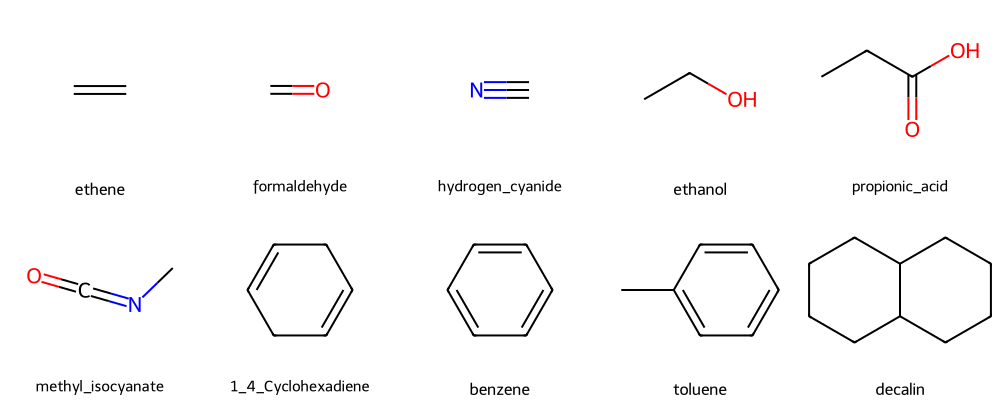

In [7]:
PandasTools.FrameToGridImage(data.head(10),  legendsCol='name', molsPerRow=5)

In [8]:
data["n_Atoms"] = data['ROMol'].map(lambda x: x.GetNumAtoms())
data.head(1)

,smiles,name,ROMol,n_Atoms
0,C=C,ethene,<rdkit.Chem.rdchem.Mol object at 0x7f436b7e4510>,2


In [ ]:
data = data.drop(['ROMol'], axis=1)
data

,smiles,name,n_Atoms
0,C=C,ethene,2
1,C=O,formaldehyde,2
2,C#N,hydrogen_cyanide,2
3,CCO,ethanol,3
4,CCC(=O)O,propionic_acid,5
5,CN=C=O,methyl_isocyanate,4


In [9]:
#use psikit to compute the optimized energy from each molecule
energy = []
from psikit import Psikit
pk=Psikit(debug=True,threads=1,memory=12)
for i in data['smiles']:
    pk.read_from_smiles(i)
    %time pk.optimize() 
    energy.append(pk.optimize())




  Memory set to  11.176 GiB by Python driver.
  Threads set to 1 by Python driver.
Optimizer: Optimization complete!
CPU times: user 1.44 s, sys: 79.3 ms, total: 1.52 s
Wall time: 1.6 s
Optimizer: Optimization complete!
Optimizer: Optimization complete!
CPU times: user 1.1 s, sys: 31.7 ms, total: 1.13 s
Wall time: 1.14 s
Optimizer: Optimization complete!
Optimizer: Optimization complete!
CPU times: user 967 ms, sys: 24.8 ms, total: 992 ms
Wall time: 999 ms
Optimizer: Optimization complete!
Optimizer: Optimization complete!
CPU times: user 3.99 s, sys: 146 ms, total: 4.14 s
Wall time: 4.18 s
Optimizer: Optimization complete!
Optimizer: Optimization complete!
CPU times: user 17.2 s, sys: 608 ms, total: 17.8 s
Wall time: 17.9 s
Optimizer: Optimization complete!
Optimizer: Optimization complete!
CPU times: user 5.84 s, sys: 126 ms, total: 5.97 s
Wall time: 6 s
Optimizer: Optimization complete!
Optimizer: Optimization complete!
CPU times: user 16.2 s, sys: 605 ms, total: 16.8 s
Wall time: 

In [10]:
energy

[-78.03876941259182,
 -113.86953646690647,
 -92.87694247782325,
 -154.08991872504927,
 -266.85898514771804,
 -206.79559264395616,
 -231.84676156717768,
 -230.71352354186277,
 -269.7535522678091,
 -389.2048425392886]

In [11]:
#add energy array to pandas dataframe
import numpy as np
energy = np.array(energy)
data['energy'] = energy.tolist()

,smiles,name,ROMol,n_Atoms,energy
0,C=C,ethene,,2,-78.038769
1,C=O,formaldehyde,,2,-113.869536
2,C#N,hydrogen_cyanide,,2,-92.876942
3,CCO,ethanol,,3,-154.089919
4,CCC(=O)O,propionic_acid,,5,-266.858985
5,CN=C=O,methyl_isocyanate,,4,-206.795593
6,C1=CCC=CC1,1_4_Cyclohexadiene,,6,-231.846762
7,C1=CC=CC=C1,benzene,,6,-230.713524
8,C1=C(C)C=CC=C1,toluene,,7,-269.753552
9,C1CCC2CCCCC2C1,decalin,,10,-389.204843

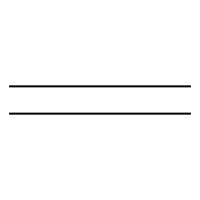
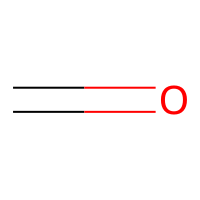
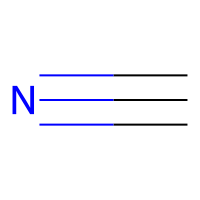
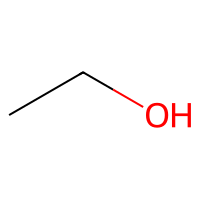
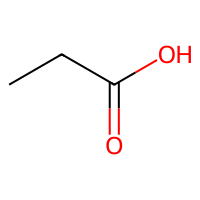
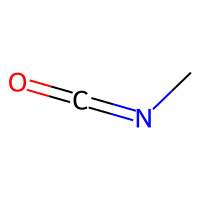
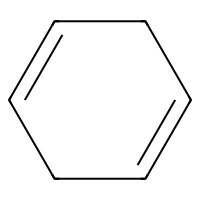
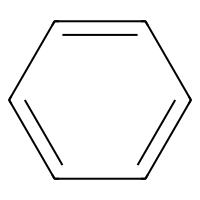
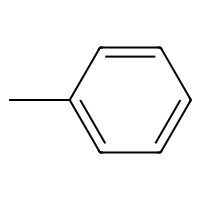
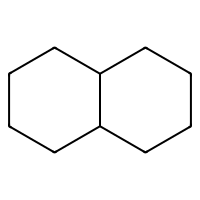

In [12]:
data